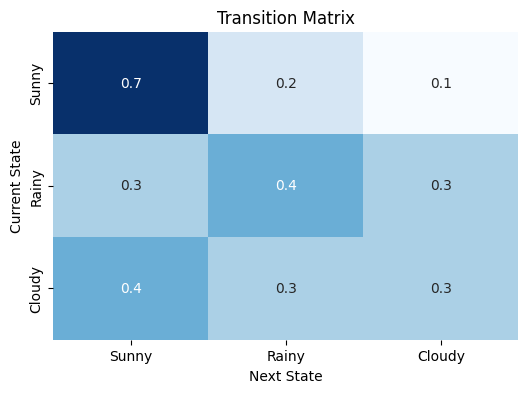

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# -------------------------------------------
# 1. 定义状态空间和转移矩阵
# -------------------------------------------
states = ['Sunny', 'Rainy', 'Cloudy']

transition_matrix = np.array([
    [0.7, 0.2, 0.1],  # Sunny -> Sunny, Rainy, Cloudy
    [0.3, 0.4, 0.3],  # Rainy -> Sunny, Rainy, Cloudy
    [0.4, 0.3, 0.3],  # Cloudy -> Sunny, Rainy, Cloudy
])

# -------------------------------------------
# 2. 可视化转移矩阵
# -------------------------------------------
plt.figure(figsize=(6, 4))
sns.heatmap(transition_matrix, annot=True, cmap="Blues",
            xticklabels=states, yticklabels=states, cbar=False)
plt.title("Transition Matrix")
plt.xlabel("Next State")
plt.ylabel("Current State")
plt.show()

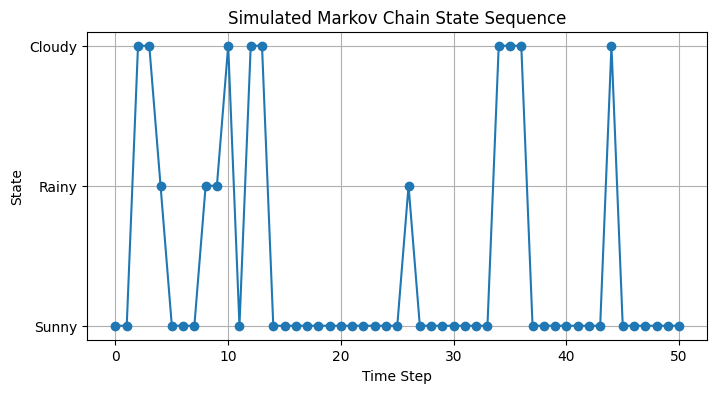

In [13]:

# -------------------------------------------
# 3. 模拟马尔可夫链
# -------------------------------------------
def simulate_chain_once(transition_matrix, states, n_steps=50, start_state=0):
    state_idx = start_state
    sequence_idx = [state_idx]
    for _ in range(n_steps):
        state_idx = np.random.choice(len(states), p=transition_matrix[state_idx])
        sequence_idx.append(state_idx)
    return sequence_idx

# 生成一个状态序列
n_steps = 50
sequence_idx = simulate_chain_once(transition_matrix, states, n_steps)

# 可视化（用数字序列画折线图）
plt.figure(figsize=(8, 4))
plt.plot(range(n_steps+1), sequence_idx, marker='o')
plt.yticks([0, 1, 2], states)
plt.title("Simulated Markov Chain State Sequence")
plt.xlabel("Time Step")
plt.ylabel("State")
plt.grid(True)
plt.show()

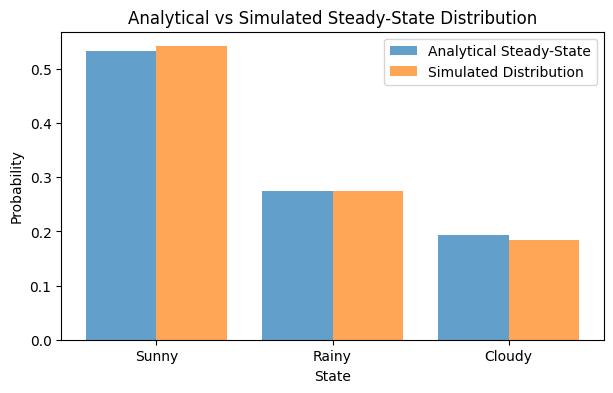

Analytical steady-state distribution: [0.53225806 0.27419355 0.19354839]
Simulated steady-state distribution : [0.5416 0.2742 0.1842]


In [14]:
# -------------------------------------------
# 4. 数学方法求稳态分布
# -------------------------------------------
def steady_state_distribution(P):
    eigvals, eigvecs = np.linalg.eig(P.T)
    v = eigvecs[:, np.isclose(eigvals, 1)]
    v = v[:, 0].real
    v = v / v.sum()
    return v

steady_state = steady_state_distribution(transition_matrix)

# -------------------------------------------
# 5. 频率统计法逼近稳态
# -------------------------------------------
def simulate_long_run(P, start_state, steps=10000):
    state = start_state
    counts = np.zeros(len(P))
    for _ in range(steps):
        counts[state] += 1
        state = np.random.choice(len(P), p=P[state])
    return counts / steps

simulated_distribution = simulate_long_run(transition_matrix, start_state=0)

# -------------------------------------------
# 6. 可视化两种稳态分布
# -------------------------------------------
plt.figure(figsize=(7, 4))
x = np.arange(len(states))

plt.bar(x - 0.2, steady_state, width=0.4, alpha=0.7, label="Analytical Steady-State")
plt.bar(x + 0.2, simulated_distribution, width=0.4, alpha=0.7, label="Simulated Distribution")

plt.xticks(x, states)
plt.title("Analytical vs Simulated Steady-State Distribution")
plt.xlabel("State")
plt.ylabel("Probability")
plt.legend()
plt.show()

print("Analytical steady-state distribution:", steady_state)
print("Simulated steady-state distribution :", simulated_distribution)

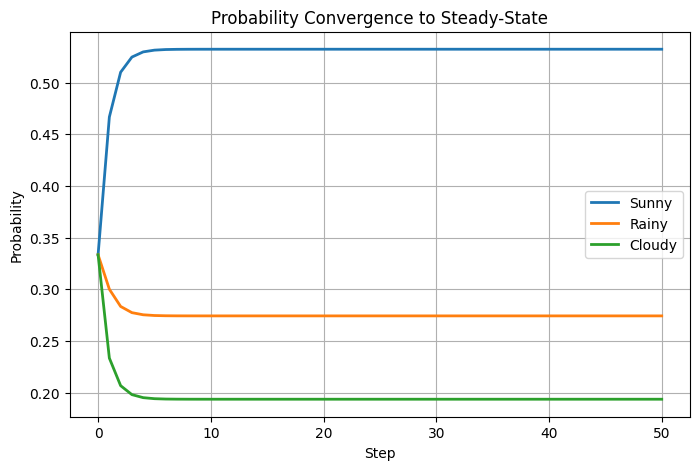

In [16]:
# -------------------------------------------
# 6. 概率收敛过程可视化 (迭代 πP)
# -------------------------------------------

def convergence_trace(P, steps=50):
    n = len(P)
    pi = np.ones(n) / n       # 初始分布：均匀
    history = [pi.copy()]     # 记录每一步

    for _ in range(steps):
        pi = pi @ P
        history.append(pi.copy())
    
    return np.array(history)

# 获取前 50 步收敛过程
trace = convergence_trace(transition_matrix, steps=50)

# -------------------------------------------
# 7. 画概率收敛折线图
# -------------------------------------------
plt.figure(figsize=(8, 5))

for i in range(len(states)):
    plt.plot(trace[:, i], label=states[i], linewidth=2)

plt.title("Probability Convergence to Steady-State")
plt.xlabel("Step")
plt.ylabel("Probability")
plt.grid(True)
plt.legend()
plt.show()


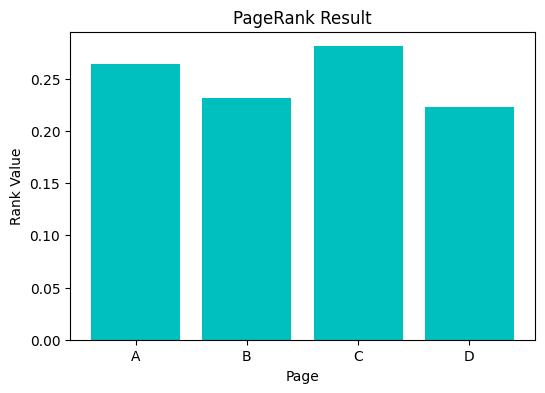

In [ ]:
# -------------------------------------------
# 7. PageRank 示例
# -------------------------------------------
states_pg = ['A', 'B', 'C', 'D']
transition_matrix_pagerank = np.array([
    [0.2, 0.3, 0.4, 0.1],
    [0.6, 0.1, 0.2, 0.1],
    [0.1, 0.3, 0.3, 0.3],
    [0.2, 0.2, 0.2, 0.4],
])

pagerank_vector = np.array([1/4]*4)
for _ in range(100):
    pagerank_vector = pagerank_vector @ transition_matrix_pagerank

plt.figure(figsize=(6, 4))
plt.bar(states_pg, pagerank_vector, color='c')
plt.title("PageRank Result")
plt.xlabel("Page")
plt.ylabel("Rank Value")
plt.show()